# PART 1 - Week 3 Assignment

In [1]:
import requests
import numpy as np
import pandas as pd

#scrapes the wikipedia page with BeautifulSoup
wikipage = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050.').text

from bs4 import BeautifulSoup
soup = BeautifulSoup(wikipage,'lxml')
#print(soup.prettify())

In [2]:
#gets the table on the page
my_table = soup.find("table",{"class":"wikitable sortable"})


In [3]:
#get the headers on the table
headers = my_table.find_all('th')
column_names = [header.text.strip() for header in headers]

In [4]:
#gets the three columns of data
postcodes = []
boroughs = []
neighbourhoods = []

for tr in my_table.find_all('tr'):
        tds = tr.find_all('td')
        if not tds:
            continue
        postcode,borough,neighbourhood = ([td.text.strip() for td in tds[:3]])
        postcodes.append(postcode)
        boroughs.append(borough)
        neighbourhoods.append(neighbourhood)

In [5]:
#writes the data to DataFrame
df = pd.DataFrame()
df[column_names[0]] = postcodes
df[column_names[1]] = boroughs
df[column_names[2]] = neighbourhoods

In [6]:
#preview of the DataFrame
print('Shape of the table:', df.shape)
df.head()

Shape of the table: (287, 3)


,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Code below deletes the rows with not assigned borough

In [7]:
# deletes the rows with not assigned borough
df = df[df.Borough != 'Not assigned']
print('Shape of the table:', df.shape)

Shape of the table: (210, 3)


In [8]:
df2 = df[:]
df2.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


## Code below assigns borough name for the rows that do not have assigned neighbourhood

In [9]:
#assigns borough name for the rows that do not have assigned neighbourhood
def assign(row):
    if row[2] == 'Not assigned':
        return row[1]
    else: 
        return row[2]
df2['Neighbourhood'] = df2.apply(assign,axis=1)
df2.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [10]:
df3 = df2[:]

## Code below combines rows for the rows that have the same postalcode

In [11]:
#combines rows for the rows that have the same postalcode
df4 = df3.groupby(['Postcode', 'Borough'],axis=0)['Neighbourhood'].apply(lambda neigh: ', '.join(neigh)).to_frame().reset_index()
df4.head(10)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


## Finally, Code below prints the number of rows of my dataframe

In [12]:
print('Shape of the table:', df4.shape)

Shape of the table: (103, 3)


# Part 2 - Week 3 Assignment

## Important Note: Since Google Geocoder gives me the error of '<[REQUEST_DENIED] Google - Geocode>', I decided to use csv file provided by the instructor for this part.

### Code below is used to read csv file in IBM Watson Studios, I hid my credential before I shared it.

In [13]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [14]:
geospatial_coordinates.shape

(103, 3)

## Code below merges the two dataframe by postcode

In [15]:
df5 =  pd.merge(df4, geospatial_coordinates, left_on='Postcode', right_on='Postal Code')

In [16]:
df5.head()

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


## Code below gives its last shape to the dataframe for the answer of Part 2 

In [17]:
df6 = df5.drop(columns=['Postal Code'])
df6.head(11)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


# Part 3 - Week 3 Assignment 

## I have decided to work with boroughs that include the word Toronto and replicate what the instructor did with New York Data

In [18]:
df7 = df6[df6['Borough'].str.contains('Toronto')]

In [19]:
print('Shape of the data: ', df7.shape)
df7.head(10)

Shape of the data:  (39, 5)


,Postcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049


In [73]:
toronto_data = df7

In [22]:
!pip install folium

     |████████████████████████████████| 92kB 8.0MB/s eta 0:00:011


In [74]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [99]:
# The code was removed by Watson Studio for sharing.

My credentails:
CLIENT_ID: R1NGCXLIX1OM3C0YYR4AWXMU2C0YGJ54SAN5OLMWMGA5SIJU
CLIENT_SECRET:FM4V3O1W3HFXGD3YUVKNHZYU3CIMVJ3RTYX1XEMDYOW3KXRV


## Code below is taken from the lab session to replicate the analysis. It gets nearby venues

In [76]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [77]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

## Code below shows the venues returned from Foursquare website 

In [78]:
print(toronto_venues.shape)
toronto_venues.head()

(868, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


## Code below shows how many venues are returned for each neighbourhood

In [79]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Adelaide, King, Richmond",30,30,30,30,30,30
Berczy Park,30,30,30,30,30,30
"Brockton, Exhibition Place, Parkdale Village",24,24,24,24,24,24
Business Reply Mail Processing Centre 969 Eastern,18,18,18,18,18,18
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",30,30,30,30,30,30
Central Bay Street,30,30,30,30,30,30
"Chinatown, Grange Park, Kensington Market",30,30,30,30,30,30
Christie,18,18,18,18,18,18


In [80]:
print('There are {} uniques venue categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 196 uniques venue categories.


## Code Below goes through the necessary steps to find average number of venues for each category in each neighbourhood

In [81]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Arts & Crafts Store,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Code below shows that there are 868 different venues in Toronto

In [82]:
toronto_onehot.shape

(868, 197)

## Code below finds out average occurence of each category in each neighbourbood by using groupby method

In [83]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Arts & Crafts Store,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,"Adelaide, King, Richmond",0.0000,0.0000,0.0000,0.000,0.000,0.000,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Berczy Park,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.033333,0.000000,...,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.0625,0.0625,0.0625,0.125,0.125,0.125,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Cabbagetown, St. James Town",0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Central Bay Street,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Chinatown, Grange Park, Kensington Market",0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.033333,...,0.000000,0.000000,0.000000,0.033333,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000
8,Christie,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Church and Wellesley,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000


## Code below confirms that we have 39 neighbourhoods and 197 different categories in total

In [84]:
toronto_grouped.shape

(39, 197)

## Code below gets the ten most common venue categories for each neighbourhood

In [85]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [86]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Café,Seafood Restaurant,Hotel,Asian Restaurant,Monument / Landmark,Gym / Fitness Center,Restaurant,Colombian Restaurant,Plaza,Smoke Shop
1,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Café,Farmers Market,Beer Bar,Bakery,Restaurant,Breakfast Spot,Fish Market
2,"Brockton, Exhibition Place, Parkdale Village",Coffee Shop,Café,Breakfast Spot,Nightclub,Pet Store,Restaurant,Japanese Restaurant,Italian Restaurant,Intersection,Stadium
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Pizza Place,Smoke Shop,Recording Studio,Brewery,Butcher,Restaurant,Auto Workshop,Spa,Farmers Market
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Airport Terminal,Airport,Coffee Shop,Boutique,Boat or Ferry,Rental Car Location,Plane,Harbor / Marina


## K mean clustering is used to cluster similar venues in neighbourhoods and I tried different k's to find out the most suitable number of clusters. Here in the graph, you can see that the sum of squared distance decreases fast until it reaches 3. So, I employed elbow method here and decided to set k=3.

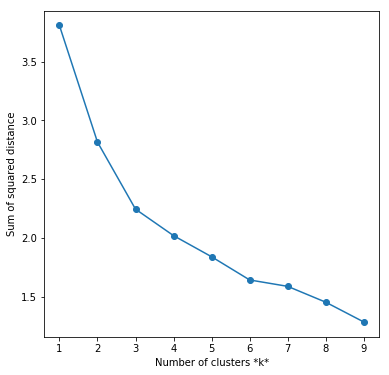

In [91]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [92]:
# set number of clusters
kclusters = 3

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [93]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Trail,Health Food Store,Neighborhood,Pub,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Ice Cream Shop,Italian Restaurant,Yoga Studio,Cosmetics Shop,Brewery,Bubble Tea Shop,Restaurant,Café,Pub
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,0,Park,Fish & Chips Shop,Sandwich Place,Brewery,Restaurant,Liquor Store,Italian Restaurant,Board Shop,Pub,Ice Cream Shop
43,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Bakery,Italian Restaurant,Pet Store,Bookstore,Seafood Restaurant,Brewery,Sandwich Place,Cheese Shop
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,1,Park,Swim School,Bus Line,Yoga Studio,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run


In [94]:
latitude = 43.6532
longitude = - 79.3832

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [95]:
#Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,The Beaches,0,Trail,Health Food Store,Neighborhood,Pub,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run
41,"The Danforth West, Riverdale",0,Greek Restaurant,Ice Cream Shop,Italian Restaurant,Yoga Studio,Cosmetics Shop,Brewery,Bubble Tea Shop,Restaurant,Café,Pub
42,"The Beaches West, India Bazaar",0,Park,Fish & Chips Shop,Sandwich Place,Brewery,Restaurant,Liquor Store,Italian Restaurant,Board Shop,Pub,Ice Cream Shop
43,Studio District,0,Café,Coffee Shop,Bakery,Italian Restaurant,Pet Store,Bookstore,Seafood Restaurant,Brewery,Sandwich Place,Cheese Shop
45,Davisville North,0,Hotel,Gym,Sandwich Place,Food & Drink Shop,Department Store,Breakfast Spot,Park,Convenience Store,Discount Store,Electronics Store
46,North Toronto West,0,Clothing Store,Coffee Shop,Yoga Studio,Sporting Goods Shop,Gym / Fitness Center,Fast Food Restaurant,Diner,Dessert Shop,Mexican Restaurant,Park
47,Davisville,0,Dessert Shop,Sandwich Place,Coffee Shop,Italian Restaurant,Café,Gym,Sushi Restaurant,Pizza Place,Gourmet Shop,Seafood Restaurant
49,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",0,Coffee Shop,Pub,Pizza Place,American Restaurant,Bank,Sports Bar,Fried Chicken Joint,Supermarket,Sushi Restaurant,Restaurant
51,"Cabbagetown, St. James Town",0,Italian Restaurant,Coffee Shop,Restaurant,Café,Pub,Japanese Restaurant,Jewelry Store,Sandwich Place,Butcher,Caribbean Restaurant
52,Church and Wellesley,0,Coffee Shop,Pub,Beer Bar,Diner,Ethiopian Restaurant,Ice Cream Shop,Indian Restaurant,Bookstore,Park,Sushi Restaurant


In [96]:
#Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Lawrence Park,1,Park,Swim School,Bus Line,Yoga Studio,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run
48,"Moore Park, Summerhill East",1,Park,Playground,Restaurant,Tennis Court,Comfort Food Restaurant,Comic Shop,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run
50,Rosedale,1,Park,Playground,Trail,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run,Distribution Center
64,"Forest Hill North, Forest Hill West",1,Park,Jewelry Store,Trail,Sushi Restaurant,Bus Line,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [97]:
#Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Roselawn,2,Garden,Yoga Studio,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run,Distribution Center


## K means clustering was helpful to cluster shops and cafes together and distinguish parks and playgrounds in general. 